In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f1 = open('X_train300', 'rb')
X_train = pickle.load(f1)
f1.close()

In [22]:
dataTrain = pd.read_pickle('trainReduced')

In [23]:
dataTrain.head()

,qid,question_text,target
1230084,f10da363cb457e4c60c3,Is there any way I can play videos from Google...,0
1236209,f242c600958872ff5b2f,How do I make it say a certain date on ’their ...,0
1084571,d48b89e2d8713c72c1cb,Which is the best company for regular rolled o...,0
598192,752aba52e05a2c7e7f46,How can a Nepali worker from Malaysia go to Si...,0
864468,a9623a55b06591fb6568,What does it mean when a girl challenges you?,0


In [32]:
#selecting only 10000 samples to feed into tsne for speed
from sklearn.utils import shuffle
X_plus_target = np.hstack((X_train, dataTrain['target'].values.reshape(-1,1)))
X_train_shuffled = shuffle(X_plus_target)

In [5]:
from sklearn.manifold import TSNE

In [68]:
tsne = TSNE(metric='cosine', verbose=2,  n_components=3)

In [69]:
X_train_tsne = tsne.fit_transform(X_train_shuffled[0:10000,:-1])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 4.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.225555
[t-SNE] Computed conditional probabilities in 0.695s
[t-SNE] Iteration 50: error = 96.7352066, gradient norm = 0.0000004 (50 iterations in 30.663s)
[t-SNE] I

In [70]:
tsne.embedding_

array([[  4.5578203,  -0.6566722,  28.210552 ],
       [ 11.682445 ,  -4.4307556, -31.959099 ],
       [  1.9044714,  19.935686 ,  27.296343 ],
       ...,
       [-17.866943 ,  16.427547 ,  -9.333454 ],
       [ 12.053028 ,  18.281773 , -19.162828 ],
       [-15.333223 ,   5.232333 ,  15.820984 ]], dtype=float32)

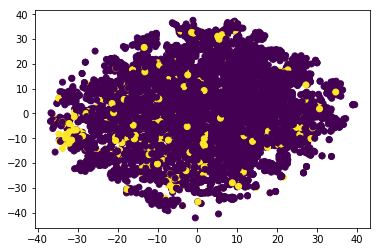

In [71]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], c = X_train_shuffled[0:10000,-1])

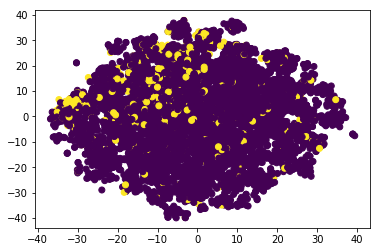

In [72]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,2], c = X_train_shuffled[0:10000,-1])

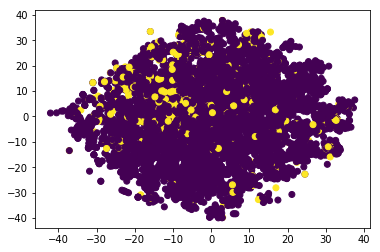

In [73]:
plt.scatter(tsne.embedding_[:,1], tsne.embedding_[:,2], c = X_train_shuffled[0:10000,-1])

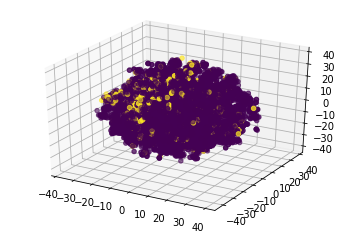

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xs = tsne.embedding_[:,0], ys = tsne.embedding_[:,1], zs = tsne.embedding_[:,2], c = X_train_shuffled[0:10000,-1])